**This is a thought experiment; how well can we resolve difference in the 'proportion' of age components?**

To think about this I'm going to consider a permutation text of two samples. If there are no differences in the relative proportions of an age component, then the differences we see in two groups are just due to random sampling (and the sample labels are arbitrary). 

We can explore how much variability in the proportion we'd see in this null hypothesis by randomly sampling two groups from a 'pooled' distribution of all the ages from our two samples of interest.

In [1]:
#First lets load some helpful libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Next lets load in some data - do this in your favorite way; I've just pasted data in here for simplicity
ages1 = np.array([150,280,221,305,187,200,156,268,400,251,274,398,382,345,385,369,365,336,352,440,415,421,422,510,510,729,496,386,404,457,468,381,479,517,480,481,497,478,701,549,731,555,571,690,542,638,675,638,686,690,596,540,534,742,829,874,927,953,963,1000,1003,1003,1005,1006,1029,1033,1036,1046,1047,1054,1055,1057,1059,1061,1062,1071,1074,1075,1076,1087,1097,1098,1115,1123,1130,1134,1139,1149,1150,1162,1168,1173,1182,1187,1196,1236,1239,1277,1283,1288,1292,1294,1299,1315,1317,1330,1342,1345,1384,1391,1409,1415,1421,1449,1503,1556,1563,1592,1593,1601,1624,1625,1638,1640,1645,1646,1660,1666,1670,1709,1723,1734,1750,1764,1771,1783,1787,1812,1876,1881,1883,1972,2134,2145,2174,2595,2678,2735,3415])
ages2 = np.array([60.29,69.6,90.8,106.5,106.6,108.2,108.8,109.3,111.9,152.6,171.7,189.4,208.5,268.3,270.9,320.7,325,346.6,351.5,384.2,391.6,403.8,406.5,412,413.6,441.1,443.3,453,465.9,494,529,531.4,592.8,602.8,604.3,632,643,683,846,947,948,977,981,983,985,987,996,1019,1027,1028,1030,1032,1040,1043,1044,1045,1046,1047,1050,1050,1051,1051,1056,1062,1064,1066,1068,1075,1077,1079,1080,1084,1084,1086,1087,1092,1093,1094,1097,1104,1105,1110,1112,1114,1115,1115,1116,1116,1116,1118,1122,1128,1128,1129,1132,1137,1144,1145,1148,1153,1157,1161,1161,1161,1167,1197,1205,1210,1215,1229,1265,1358,1368,1372,1442,1449,1450,1451,1460,1476,1506,1539,1550,1651,1678,1706,1720,1724,1738,1756,1759,1794,1839,1864,1988,2070,2535,2636,2653,2674,2736])

lumpedAges = np.hstack((ages1,ages2)) #Create a stacked version of the array, e.g. the lumped sampled


In [3]:
#To plot up the data lets create a function to calculate KDEs
def kde(timeAxis,GrainAges,bandwidth):
    '''timeAxis: a numpy array of ages that define the time axis
    grainAges: the observed obvsercations
    bandwidth: the bandwidth of the kernel
    '''
    #The kernel
    Kernel = lambda t: (1/np.sqrt(2.0*np.pi))*np.exp((-t**2)/2)

    #The preallocate values of the KDE
    KDE = np.zeros_like(timeAxis)

    #Iterate through the ages
    for age in GrainAges:
        KDE+= Kernel((timeAxis - age) / bandwidth)

    return (1.0/(len(GrainAges)*bandwidth))*KDE

In [4]:
#We are going to compare the 'fractions' of zircons in pre-defined age bins, and specifically differences in the proportion between two samples
minAge = 900.0 #The minimum bound of our age bin
maxAge = 1250.0 #The maximum bound of our age bin

#Lets make a function to count the number of grains in our age bin and normalize by the total number of grains
def binFraction(ages,minAge,maxAge):
    count = np.sum((ages >= minAge) & (ages <= maxAge)) #How many grains are between these ages (inclusive of bounds)
    return count/len(ages)

obsDelFrac = binFraction(ages1,minAge,maxAge) - binFraction(ages2,minAge,maxAge) #What is the difference in the fraction of grains in the two bins
obsDelFrac = np.abs(obsDelFrac) #Lets just onsider the absolute value of this difference


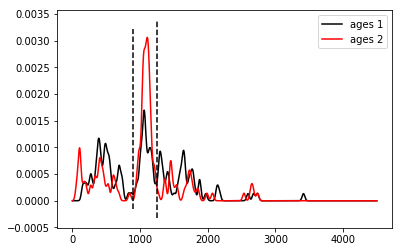

In [5]:
#Now lets use our function to plot a KDE, and shade the region of our interval of interest
ageAxis = np.arange(0,4500,1.0)
bw = 20.0

plt.plot(ageAxis,kde(ageAxis,ages1,bw),'-k',label = 'ages 1')
plt.plot(ageAxis,kde(ageAxis,ages2,bw),'-r',label = 'ages 2')
plt.plot([minAge,minAge],plt.gca().get_ylim(),'--k')
plt.plot([maxAge,maxAge],plt.gca().get_ylim(),'--k')
plt.legend()

In [6]:
#Now comes the permutation test, lets resample two groups from our 'lumped' set of values

nIterations = 10000 #How many iterations should we preform?
randomDelFracs = np.zeros(nIterations) #Preallocate some space for saving the results of the permutations test

#Loop through the number of iterations we decided on
for i in range(nIterations):
    
    #Create two random draws from the lumped ages of the same size
    ages1_randSample = np.random.choice(lumpedAges,size = len(ages1),replace = True) #grab a random sample, with replacement
    ages2_randSample = np.random.choice(lumpedAges,size = len(ages2),replace = True) #grab a random sample, with replacement
    
    randomDelFracs[i] = np.abs(binFraction(ages1_randSample,minAge,maxAge) - binFraction(ages2_randSample,minAge,maxAge))


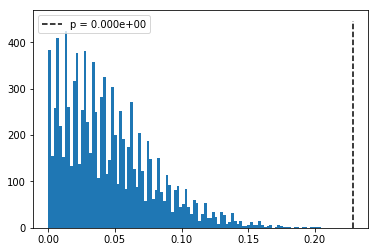

In [9]:
#Now lets plot up the results
#How common is it for a random observation to be as large or larger than our observation?
pAprox = np.sum(randomDelFracs >= obsDelFrac)/nIterations 

plt.hist(randomDelFracs,bins = 100, histtype = 'stepfilled')
plt.plot([obsDelFrac,obsDelFrac], plt.gca().get_ylim(),'--k', label = 'p = {:.3e}'.format(pAprox))
plt.legend()